# <center>Кластеризацiя засобами бiблiотеки Scikit-Learn Python</center>

### 1. Графічне представлення даних

In [1]:
#імпортуємо усі модулі, які будемо використовувати надалі

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [2]:
X, y = make_moons(n_samples = 10000, noise=0.04)
df = pd.DataFrame(dict(X1=X[:, 0], X2=X[:, 1], y=y))
df

,X1,X2,y
0,0.988653,0.147396,0
1,0.211315,1.000142,0
2,1.702444,-0.212700,1
3,0.167409,0.030187,1
4,1.759524,-0.089843,1
...,...,...,...
9995,-0.925459,0.385375,0
9996,0.185799,-0.127954,1
9997,0.889153,0.486508,0
9998,-0.423944,0.888138,0


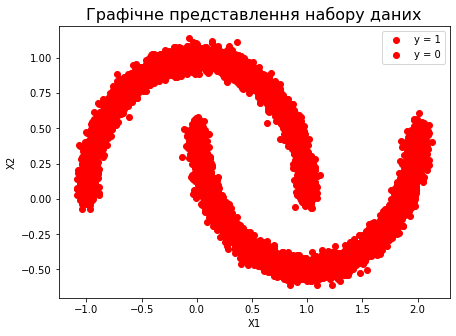

In [3]:
plt.figure(figsize=(7,5))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='y = 1')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='y = 0')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Графічне представлення набору даних', size = 16 )
plt.legend()
plt.show()

### 2,3.Побудова моделі кластеризації

In [4]:
from sklearn.cluster import SpectralClustering

start = time.time()
sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(X)
end = time.time()

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


### 4. Графічне представлення розбиття на кластери

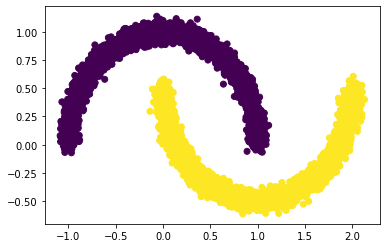

In [5]:
labels = sc.labels_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

### 5. Розрахунок часу кластеризації

In [6]:
print("The time of execution of above program is :",
      (end-start), "sec")

The time of execution of above program is : 83.8563723564148 sec


### 6. Побудова альтернативних моделей

In [54]:
# перші дві альтернативні моделі матимуть різні значення кластерів

start_3 = time.time()
sc_3 = SpectralClustering(n_clusters=3, affinity='nearest_neighbors').fit(X)
end_3 = time.time()
sc_4 = SpectralClustering(n_clusters=4, affinity='nearest_neighbors').fit(X)
end_4 = time.time()

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


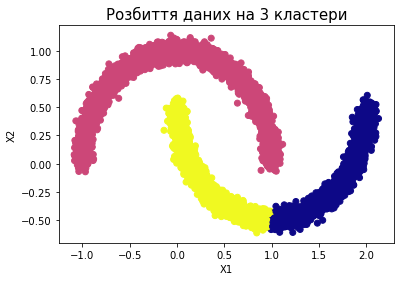

In [14]:
labels_3 = sc_3.labels_
plt.scatter(X[:,0], X[:,1], c=labels_3, cmap='plasma')
plt.title('Розбиття даних на 3 кластери', size=15)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

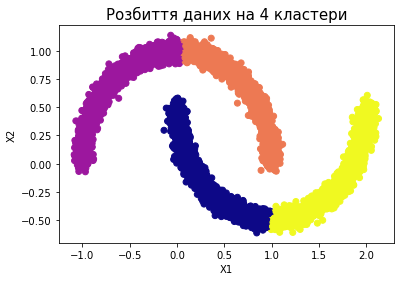

In [10]:
labels_4 = sc_4.labels_
plt.scatter(X[:,0], X[:,1], c=labels_4, cmap='plasma')
plt.title('Розбиття даних на 4 кластери', size=15)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [55]:
print("Результати метрик якості для альтернативної моделі sc_3:\n")
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_3))
print("Silhouette Score:",silhouette_score(X, labels_3))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_3))
print('Work Time for model sc_3:', (end_3-start_3), 'sec')

Результати метрик якості для альтернативної моделі sc_3:

Davies-Bouldin Score: 1.0838361750615941
Silhouette Score: 0.35195081217648827
Adjusted Rand Score: 0.7499979073421581
Work Time for model sc_3: 52.638469219207764 sec


In [57]:
print("Результати метрик якості для альтернативної моделі sc_4:\n")
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_4))
print("Silhouette Score:",silhouette_score(X, labels_4))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_4))
print('Work Time for model sc_4:', (end_4-end_3), 'sec')

Результати метрик якості для альтернативної моделі sc_4:

Davies-Bouldin Score: 0.7862251459487535
Silhouette Score: 0.4936350882169656
Adjusted Rand Score: 0.5003868736105368
Work Time for model sc_4: 22.04704999923706 sec


In [47]:
# побудуємо ще 2 альтернативні моделі, тільки змінимо значення параметрів

start_time = time.time()
sc_alt = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            eigen_solver='lobpcg').fit(X)
end_time = time.time()

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [48]:
labels_alt = sc_alt.labels_

In [49]:
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_alt))
print("Silhouette Score:",silhouette_score(X, labels_alt))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_alt))
print("\n\nWork Time:", (end_time - start_time), "sec")

Davies-Bouldin Score: 1.149799505642599
Silhouette Score: 0.33796438989112365
Adjusted Rand Score: 1.0


Work Time: 6.198617935180664 sec


In [51]:
start_t = time.time()
sc_alt_2 = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            eigen_solver='amg').fit(X)
end_t = time.time()

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [53]:
labels_alt_2 = sc_alt_2.labels_
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels_alt_2))
print("Silhouette Score:",silhouette_score(X, labels_alt_2))
print("Adjusted Rand Score:",adjusted_rand_score(y, labels_alt_2))
print("\n\nWork Time:", (end_t - start_t), "sec")

Davies-Bouldin Score: 1.149799505642599
Silhouette Score: 0.33796438989112365
Adjusted Rand Score: 1.0


Work Time: 0.9940364360809326 sec


### 7. Розрахунок значень метрик якості кластеризації головної моделі

In [13]:
print('Davies-Bouldin Score:',davies_bouldin_score(X, labels))

print("Silhouette Score:",silhouette_score(X, labels))

print("Adjusted Rand Score:",adjusted_rand_score(y, labels))

Davies-Bouldin Score: 1.1510856083195413
Silhouette Score: 0.3375767196043007
Adjusted Rand Score: 1.0


### 8. Аналіз результатів кластеризації

<font size="4"><center><i>Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?</i><center></font>

In [17]:
# видалимо 5% даних

df = pd.DataFrame(dict(X1=X[:, 0], X2=X[:, 1], y=y))
new_df = df
new_df

,X1,X2,y
0,0.988653,0.147396,0
1,0.211315,1.000142,0
2,1.702444,-0.212700,1
3,0.167409,0.030187,1
4,1.759524,-0.089843,1
...,...,...,...
9995,-0.925459,0.385375,0
9996,0.185799,-0.127954,1
9997,0.889153,0.486508,0
9998,-0.423944,0.888138,0


In [18]:
rand_arr = np.random.randint(10000, size=500)
new_df = new_df.drop(labels=rand_arr, axis=0)

In [23]:
X5 = new_df[['X1','X2']].to_numpy()
y5 = new_df['y'].to_numpy()

In [25]:
sc_5 = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors').fit(X5)

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [26]:
labels_5 = sc_5.labels_

In [27]:
print('Davies-Bouldin Score:',davies_bouldin_score(X5, labels_5))

print("Silhouette Score:",silhouette_score(X5, labels_5))

print("Adjusted Rand Score:",adjusted_rand_score(y5, labels_5))

Davies-Bouldin Score: 1.1540993517556555
Silhouette Score: 0.33673252807676574
Adjusted Rand Score: 1.0


In [34]:
# видалимо 15% даних

rand_arr_15 = np.random.randint(10000, size=1500)
df_15 = df
df_15 = df_15.drop(labels=rand_arr_15, axis=0)
X_15 = df_15[['X1','X2']].to_numpy()
y_15 = df_15['y'].to_numpy()

In [36]:
sc_15 = SpectralClustering(n_clusters = 2, affinity='nearest_neighbors').fit(X_15)

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [37]:
labels_15 = sc_15.labels_

In [38]:
print('Davies-Bouldin Score:',davies_bouldin_score(X_15, labels_15))

print("Silhouette Score:",silhouette_score(X_15, labels_15))

print("Adjusted Rand Score:",adjusted_rand_score(y_15, labels_15))

Davies-Bouldin Score: 1.1590898203998035
Silhouette Score: 0.3354154988393716
Adjusted Rand Score: 1.0


In [39]:
# видалимо 35% даних

rand_arr_35 = np.random.randint(10000, size=3500)
df_35 = df
df_35 = df_35.drop(labels=rand_arr_35, axis=0)
X_35 = df_35[['X1','X2']].to_numpy()
y_35 = df_35['y'].to_numpy()

In [40]:
sc_35 = SpectralClustering(n_clusters = 2, affinity='nearest_neighbors').fit(X_35)

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [42]:
labels_35 = sc_35.labels_

In [43]:
print('Davies-Bouldin Score:',davies_bouldin_score(X_35, labels_35))

print("Silhouette Score:",silhouette_score(X_35, labels_35))

print("Adjusted Rand Score:",adjusted_rand_score(y_35, labels_35))

Davies-Bouldin Score: 1.1477789530282447
Silhouette Score: 0.33840753205568525
Adjusted Rand Score: 1.0


In [41]:
# наостанок видалимо 45% даних

rand_arr_45 = np.random.randint(10000, size=4500)
df_45 = df
df_45 = df_45.drop(labels=rand_arr_35, axis=0)
X_45 = df_45[['X1','X2']].to_numpy()
y_45 = df_45['y'].to_numpy()

In [44]:
sc_45 = SpectralClustering(n_clusters = 2, affinity='nearest_neighbors').fit(X_45)

D:\anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [45]:
labels_45 = sc_45.labels_

print('Davies-Bouldin Score:',davies_bouldin_score(X_35, labels_35))
print("Silhouette Score:",silhouette_score(X_35, labels_35))
print("Adjusted Rand Score:",adjusted_rand_score(y_35, labels_35))

Davies-Bouldin Score: 1.1477789530282447
Silhouette Score: 0.33840753205568525
Adjusted Rand Score: 1.0


Отже, у даному пункті ми видаляли різну кількість даних: починаючи з 5% і закінчуючи 45% даних.
Для оновлених даних побудували окрему модель та знайшли результати значень метрик якості кластеризації.
Порівнюючи усі отримані результати для кожного такого набору даних між собою та між результати головної моделі,
ми помітимо, що значення однакові(до 2 знаків після коми включно). Графічно побудувавши результаи кластеризації,
можна пересвідчитись у стабільності розбиття.
<b>Отже,  розбиття є стабільним після видалення деяких даних.</b>

### 9,10. Висновки про якість роботи моделей та вибір найкращої моделі

В результаті роботи з поточним набором даних я побудувала 5 моделей:
- основна модель, що розбиває модель на 2 кластери;
- 2 альтернативні моделі з розбиттям на 3 та 4 кластери відповідно;
- 2 альтернативні моделі з іншими значеннями параметру моделі 'eigen_solver'.

Для кожної з моделей були знайдені значення метрик якості роботи, а також час побудови моделі.
Порівнюючи результати метрик, бачимо, що моделі, які розбивали дані на 3 або ж 4 кластери мали найгірші значення
метрик(Adjusted Rand Score). 

<i>Чому інші дві метрики показали "кращі" результати?</i> 
Справа в тому, що метрика davies_bouldin_score визначається як середня міра подібності кожного кластера з його найбільш схожим кластером, де подібність є відношенням  відстаней усередині кластера до відстаней між кластерами. Порівнюючи розбиття на 4 кластери та на 2 кластери, можемо зрозуміти, що відстань між 4-ма кластерами більші за значеннями, ніж відстані між 2-ма кластерами, що і вплинуло на результат даної метрики.

Значення коефіцієнту силуету, що близькі до 0 вказують на те, що вибірка знаходиться на або дуже близько до границі рішень між двома сусідніми кластерами.

Тепер проаналізуємо альтернативні моделі, які мали різні значення параметру 'eigen_solver'.
Порівнюючи з основною моделлю, результати значень метрик якості були однаковими(включно до 2-х знаків після коми).
Але тепер порівняємо час роботи кожної з трьох моделей:
- час роботи основної моделі: ~ 84 секунди;
- час роботи моделі sc_alt: ~ 6 секунд;
- час роботи моделі sc_alt_2: ~ 1 секунда. 

Як можемо помітити, що остання модель показала себе найкраще серед інших наведених. Проте, наведу трішки теоретичної інформації
для кращого аналізу. Параметр eigen_solver може приймати 3 значення - 'amg', 'arpack', 'lobpcg' (default = 'arpack').
Даний параметр визначає метод пошуку власних чисел. Так, 'lobpcg'  та 'amg' працюють швидше, але 'amg' на великих наборах даних, попри швидкодію, може бути нестабільним. Наший набір даних складається 10 000 об'єктів, тому для нього доцільно використати
метод 'amg'. А от для набагато більших датасетів краще використосувати 'lobcpg' для уникнення проблеми нестабільності.

<b>Остаточно, для поточного набору даних найкращою моделлю можна вважати модель sc_alt_2.</b>


*<i>Але при збільшенні кількості прикладів, доцільніше взяти за найкращу модель sc_alt.*</i>